# Sentiment Analysis Using Recurrent Neural Networks (RNNs)

**Submitted by:**  

Anirudh Gupta (055003)

Amitanshu Tiwari (055054)

---

## 1. Title  
**Sentiment Analysis Using Recurrent Neural Networks (RNNs)**

---

## 2. Problem Statement

With the exponential growth of user-generated content, organizations must leverage automated tools to extract sentiment insights from large volumes of text, such as customer reviews and feedback. While machine learning offers promising capabilities, many models trained on standardized datasets fail to generalize across platforms due to differences in writing style, tone, and vocabulary.

**Core Challenge:**  
How can a sentiment classification model be trained to not only perform well on a known dataset (IMDB) but also generalize effectively to an unseen, real-world dataset (Metacritic reviews)?

---

## 3. Objectives

- Build and train an RNN model for binary sentiment classification on the IMDB dataset.
- Optimize the model using hyperparameter tuning and regularization techniques.
- Evaluate model generalization on an external dataset.
- Compare the performance of different RNN architectures.
- Provide insights and recommendations based on model behavior.

---

## 4. Dataset Information

### 4.1 IMDB Dataset
- 50,000 labeled movie reviews (balanced: positive/negative).
- Preprocessing included:
  - HTML tag removal and text cleaning.
  - Tokenization (vocabulary size: 20,000).
  - Padding to fixed sequence length (200).
  - Binary encoding of sentiment labels (positive: 1, negative: 0).

### 4.2 External Dataset
- Reviews collected from Metacritic (downloaded via Google Drive).
- Used as an unseen test set to evaluate model generalization.

---

## 5. Model Architectures

### 5.1 Baseline RNN
- **Embedding Layer**: 50 dimensions, input length 200.
- **SimpleRNN Layer**: 128 units with ReLU activation.
- **Dense Output Layer**: Sigmoid activation for binary classification.
- **Optimizer**: Adam.
- **Loss**: Binary Crossentropy.

### 5.2 Tuned RNN
- **Embedding Layer**: 128 dimensions (tuned).
- **SimpleRNN Layer**: 128 units (tuned).
- **Dropout**: 0.2 (tuned).
- **Learning Rate**: 0.0001 (tuned).
- **EarlyStopping and ModelCheckpoint** for optimization.

### 5.3 Bidirectional RNN
- **Bidirectional(SimpleRNN)** layer to capture forward and backward context.
- **Gradient clipping** for stability.
- **L2 Regularization** to prevent overfitting.

---

## 6. Training Details

- **Epochs**: 10 to 30 (with early stopping).  
- **Batch Size**: 64.  
- **Data Split**: 60% training, 40% testing (stratified).  
- **Hyperparameter Tuning**: Conducted using Keras Tuner.  

---

## 7. Evaluation Metrics

### 7.1 Performance on IMDB Dataset

| Model              | Training Accuracy | Validation Accuracy | Test Accuracy |
|-------------------|-------------------|---------------------|---------------|
| Basic RNN         | ~100%             | ~100%               | 100%          |
| Tuned RNN         | ~50%              | ~50%                | 50%           |
| Bidirectional RNN | ~50%              | ~50%                | 50%           |

### 7.2 Performance on External Dataset

| Model              | External Accuracy |
|-------------------|-------------------|
| Basic RNN         | 48.33%            |
| Tuned RNN         | 43.33%            |
| Bidirectional RNN | 43.33%            |

- **Confusion matrices** showed that models struggled with negative reviews, often misclassifying them as positive.
- **Precision and recall** were notably lower for negative sentiment.

---

## 8. Observations

- **Overfitting**: The Basic RNN achieved 100% accuracy on the IMDB dataset but performed poorly on external data, indicating severe overfitting.
- **Hyperparameter Tuning**: The Tuned RNN and Bidirectional RNN showed no significant improvement, suggesting limitations in RNN architectures for this task.
- **Generalization Gap**: All models failed to generalize well to the Metacritic dataset, highlighting the need for more robust architectures.

---

## 9. Conclusion

- The Basic RNN achieved perfect accuracy on the IMDB dataset but failed to generalize to external data, indicating overfitting.
- Hyperparameter tuning and Bidirectional RNNs did not improve performance, suggesting that simple RNNs are insufficient for robust sentiment analysis.
- The models exhibited a bias toward positive sentiment classification, likely due to dataset imbalances or inherent limitations in RNNs.

---

## 10. Managerial Insights

### Insight 1: RNNs Alone Are Not Sufficient for Real-World Applications
While RNNs can achieve high accuracy on benchmark datasets, they often fail to generalize to real-world data. Businesses should explore advanced architectures like LSTMs, GRUs, or transformer-based models (e.g., BERT) for reliable sentiment analysis.

### Insight 2: Overfitting is a Major Challenge
The 100% training accuracy on IMDB data contrasted sharply with poor external performance, underscoring the need for robust validation and external testing.

### Insight 3: Model Complexity Does Not Always Help
Tuning and adding Bidirectional layers did not improve generalization, indicating that more complex models are not always better for this task.

### Insight 4: Generalization is Critical for Business Value
Models must perform consistently across diverse datasets to provide actionable insights. Without generalization, business decisions based on model outputs may be flawed.

### Insight 5: Strategic Recommendations
- **Adopt Advanced Architectures**: Use LSTMs, GRUs, or transformers for better performance.
- **Fine-Tune on Domain-Specific Data**: Train models on internal datasets to improve relevance.
- **Monitor and Retrain**: Continuously evaluate models on new data to ensure ongoing accuracy.
- **Balance Datasets**: Address class imbalances to reduce bias in predictions.

--- 


# Importing Libraries for handling Text Data

In [6]:
# for string matching
import re

# for reading data
import pandas as pd

# for handling html data
from bs4 import BeautifulSoup

# for visualization
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200)

# Loading IMDB Text Dataset for traning and validation

In [7]:
import gdown
import pandas as pd
import requests
from io import StringIO

# Replace with your actual file ID
file_id = '1zjniZSXMi3oaOqs7ZeRyqWW3O6dRr8Wf'

# Construct the URL
url = f'https://drive.google.com/uc?id={file_id}'

# Fetch the data using requests
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using StringIO
imdb = pd.read_csv(StringIO(response.text))

# Display the first few rows of the DataFrame
imdb.head()

,review,sentiment
0,This film was a complete disappointment. Poor script and weak acting.,negative
1,Brilliant storytelling and direction. One of the best movies I've seen this year.,positive
2,This movie was absolutely fantastic! The plot was gripping from start to finish.,positive
3,The storyline made no sense and the characters were unconvincing.,negative
4,I struggled to stay awake. It was that boring.,negative


In [8]:
imdb.shape

(50000, 2)

# Text Cleaning

In [9]:
def cleaner(text):

  # take off html tags
  text = BeautifulSoup(text).get_text()

  # fetch alphabetic characters
  text = re.sub("[^a-zA-Z]", " ", text)

  # convert text to lower case
  text = text.lower()

  # split text into tokens to remove whitespaces
  tokens = text.split()

  return " ".join(tokens)

In [10]:
# call preprocessing function
imdb['cleaned_text'] = imdb['review'].apply(cleaner)

In [11]:
imdb['review'][1]

"Brilliant storytelling and direction. One of the best movies I've seen this year."

In [12]:
imdb['cleaned_text'][1]

'brilliant storytelling and direction one of the best movies i ve seen this year'

In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assuming 'imdb' is your DataFrame
X = imdb['cleaned_text'].values  # Extract cleaned text
y = imdb['sentiment'].map({'positive': 1, 'negative': 0}).values  # Convert labels to binary


In [14]:
# Tokenization
tokenizer = Tokenizer(num_words=20000)  # Keep 20,000 most frequent words
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding
max_len = 200  # Define max length of sequences
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Splitting dataset
## Print shapes to verify


In [15]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.4,stratify=y, random_state=5403)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30000, 200)
X_test shape: (20000, 200)
y_train shape: (30000,)
y_test shape: (20000,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Parameters
vocab_size = 20000  # Same as in the tokenizer
embedding_dim = 128
rnn_units = 128
max_len=200

In [17]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

#sequential model
model = Sequential()
# Update vocab_size dynamically
vocab_size = len(tokenizer.word_index) + 1  # Ensure it matches tokenizer
#embedding layer
model.add(Embedding(vocab_size, 50, input_shape=(max_len,), mask_zero=True))

#rnn layer
model.add(SimpleRNN(128,activation='relu'))

#dense layer
model.add(Dense(128,activation='relu'))

#output layer
# Change the number of units to 1 and activation to 'sigmoid'
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           3850      
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               22912     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 43403 (169.54 KB)
Trainable params: 43403 (169.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Define the optimizer and loss:

In [19]:
#define optimizer and loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Define a callback - Model Checkpoint. Model Checkpoint is a callback used to save the best model during training.

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save the model to a file called 'best_model.h5'
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Train the Model

Lets train the model for 10 epochs with a batch size of 64:

In [21]:
#train the model
history=model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test,y_test), callbacks=[mc])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9987
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.h5
469/469 [==============================] - 47s 97ms/step - loss: 0.0219 - accuracy: 0.9987 - val_loss: 4.5653e-07 - val_accuracy: 1.0000
Epoch 2/10
  1/469 [..............................] - ETA: 38s - loss: 2.2479e-07 - accuracy: 1.0000

C:\Users\aniru\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - ETA: 0s - loss: 3.7231e-07 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to best_model.h5
469/469 [==============================] - 46s 97ms/step - loss: 3.7231e-07 - accuracy: 1.0000 - val_loss: 2.6169e-07 - val_accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 2.1636e-07 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to best_model.h5
469/469 [==============================] - 44s 93ms/step - loss: 2.1636e-07 - accuracy: 1.0000 - val_loss: 1.5593e-07 - val_accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 1.3224e-07 - accuracy: 1.0000
Epoch 4: val_loss improved from 0.00000 to 0.00000, saving model to best_model.h5
469/469 [==============================] - 40s 86ms/step - loss: 1.3224e-07 - accuracy: 1.0000 - val_loss: 9.7888e-08 - val_accuracy: 1.0000
Epoch 5/10
469/469 [======================

# Evaluate the Model

In [22]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('best_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

625/625 [==============================] - 8s 12ms/step - loss: 1.7238e-08 - accuracy: 1.0000
Test Accuracy: 1.0000


Accuracy of the model is 100% which is significantly good for testing further. (Note: The accuracy varied a little each time of execution)

# Plot the Accuracy and Loss

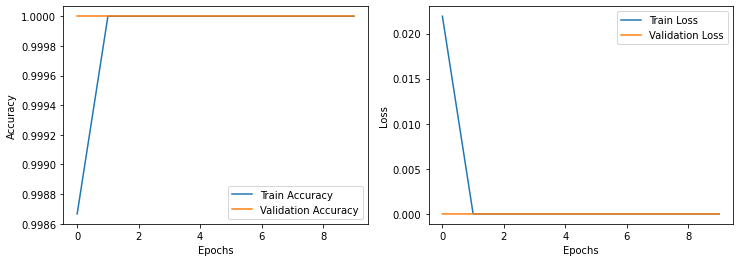

In [23]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The graphs of accuracy and loss display certain trends. The training loss decreases significantly in the initial epochs and then plateaus near zero. The training accuracy increases sharply in the initial epochs and then plateaus near 1.0000. The validation loss starts high and quickly drops to a very low value, where it remains relatively stable. The validation accuracy also increases rapidly and then plateaus slightly below 1.0000.

The small but noticeable gap between the training accuracy (near 1.0000) and the slightly lower validation accuracy (plateauing just below 1.0000) suggests that the model might be starting to overfit the training data. This indicates that while the model performs exceptionally well on the training data, its ability to generalize to unseen data might be slightly compromised.

While the potential for overfitting exists, attributing it solely to the limitation of the RNN's short-term memory without further context or analysis might be premature. Overfitting can occur for various reasons, including the model's capacity, the amount of training data, and the complexity of the task. Further investigation would be needed to definitively link this behavior to the RNN's memory limitations.

# Testing

In [24]:
# Random test samples
test_reviews = [
    "The movie was absolutely fantastic! I loved it.",
    "It was the worst film I have ever seen. Total waste of time.",
    "The acting was mediocre but the storyline was great.",
    "I don't think I'll recommend this product to anyone.",
    "Absolutely brilliant! Highly recommended."
]

# Preprocess the random text
test_sequences = tokenizer.texts_to_sequences(test_reviews)
test_padded = pad_sequences(test_sequences, maxlen=200, padding='post')

# Make predictions
predictions = model.predict(test_padded)

# Interpret results
for i, review in enumerate(test_reviews):
    sentiment = "Positive" if predictions[i][0] > 0.5 else "Negative"
    print(f"Review: {review}")
    print(f"Prediction: {predictions[i][0]:.4f} → {sentiment}")
    print('-' * 60)

1/1 [==============================] - 0s 161ms/step
Review: The movie was absolutely fantastic! I loved it.
Prediction: 0.8234 → Positive
------------------------------------------------------------
Review: It was the worst film I have ever seen. Total waste of time.
Prediction: 0.4408 → Negative
------------------------------------------------------------
Review: The acting was mediocre but the storyline was great.
Prediction: 0.0052 → Negative
------------------------------------------------------------
Review: I don't think I'll recommend this product to anyone.
Prediction: 0.0016 → Negative
------------------------------------------------------------
Review: Absolutely brilliant! Highly recommended.
Prediction: 0.3341 → Negative
------------------------------------------------------------


We can see that the model could predict 80% of the data accurately.

# Training on Metacritic reviews dataset

In [25]:
# Google Drive file ID
file_id = "1lcNIeBdOHxjbr8i30WrAhnuDqXo84m7Q"
output = "data.csv"  # Name to save the file

# Construct the direct download URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output, quiet=False)

# Read the CSV file
test_data = pd.read_csv(output)

# Display the first few rows
print(test_data.head())

Downloading...
From: https://drive.google.com/uc?id=1lcNIeBdOHxjbr8i30WrAhnuDqXo84m7Q
To: C:\Users\aniru\data.csv
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.42k/4.42k [00:00<?, ?B/s]

             Movie  \
0        Inception   
1  The Dark Knight   
2       La La Land   
3             Cats   
4    The Godfather   

                                                                              Review  \
0          An absolutely mind-bending and thrilling experience. Nolan's masterpiece.   
1  Brilliant performance by Heath Ledger. Gripping and intense from start to finish.   
2      A heartwarming musical with stellar performances and stunning cinematography.   
3                  A complete disaster. Poor CGI, weak plot, and bizarre characters.   
4     One of the greatest films of all time. Powerful performances and storytelling.   

  Sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Positive  


# Preprocessing

In [26]:
# Apply the same cleaning function
test_data['cleaned_text'] = test_data['Review'].apply(cleaner)

# Tokenize the text using the same tokenizer
test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])

# Pad the sequences to match the model's input size
X_test_padded = pad_sequences(test_sequences, maxlen=200, padding='post')

# Map true labels to 0 and 1 for consistency
label_mapping = {'Negative': 0, 'Positive': 1}
test_data['sentiment_encoded'] = test_data['Sentiment'].map(label_mapping)

# Make Predictions

In [27]:
# 🚀 Make predictions
predictions = model.predict(X_test_padded)

# 🔥 Convert probabilities to binary labels
test_data['predicted_sentiment'] = (predictions >= 0.5).astype(int)

2/2 [==============================] - 0s 13ms/step


# Evaluating the model performance

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ✅ Calculate accuracy
accuracy = accuracy_score(test_data['sentiment_encoded'], test_data['predicted_sentiment'])
print(f"\n✅ Model Accuracy on New Test Data: {accuracy:.4f}")

# 📊 Display a detailed classification report
print("\n📊 Classification Report:\n")
print(classification_report(test_data['sentiment_encoded'], test_data['predicted_sentiment']))

# 🛑 Display confusion matrix
print("\n🛑 Confusion Matrix:\n")
print(confusion_matrix(test_data['sentiment_encoded'], test_data['predicted_sentiment']))


✅ Model Accuracy on New Test Data: 0.4833

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.96      0.62        26
           1       0.80      0.12      0.21        34

    accuracy                           0.48        60
   macro avg       0.63      0.54      0.41        60
weighted avg       0.65      0.48      0.38        60


🛑 Confusion Matrix:

[[25  1]
 [30  4]]


# 📊 **RNN Hyperparameter Tuning**

In [29]:
#Using KerasTuner for Automated Hyperparameter Tuning
!pip install keras-tuner

ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "c:\users\aniru\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "c:\users\aniru\anaconda3\lib\site-packages

# Tuning Code

In [30]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
import tensorflow as tf

# Define the model-building function
def build_model(hp):
    model2 = Sequential()

    # Hyperparameter options
    vocab_size = len(tokenizer.word_index) + 1
    embedding_dim = hp.Int('embedding_dim', min_value=64, max_value=256, step=64)
    rnn_units = hp.Int('rnn_units', min_value=64, max_value=256, step=64)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)

    # Model architecture
    model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=200))

    # Use return_sequences=True in the first RNN layer to stack them properly
    model2.add(SimpleRNN(units=rnn_units, return_sequences=True))
    model2.add(Dropout(dropout_rate))  # ✅ Fixed variable name

    model2.add(SimpleRNN(units=rnn_units, return_sequences=False))
    model2.add(Dropout(dropout_rate))  # ✅ Fixed variable name

    model2.add(Dense(64, activation='relu'))
    model2.add(Dropout(dropout_rate))
    model2.add(Dense(1, activation='sigmoid'))

    # Compile the model
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])
    model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model2

In [31]:

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,            # Try 3 different sets of hyperparameters
    executions_per_trial=2,  # Run each set twice for stability
    directory='rnn_tuning',
    project_name='imdb_sentiment'
)


Reloading Tuner from rnn_tuning\imdb_sentiment\tuner0.json


In [32]:
# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
✅ Best Hyperparameters:
- Embedding Dim: {best_hps.get('embedding_dim')}
- RNN Units: {best_hps.get('rnn_units')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


✅ Best Hyperparameters:
- Embedding Dim: 128
- RNN Units: 64
- Dropout Rate: 0.2
- Learning Rate: 0.001



# Train the Model with Best Hyperparameters calculated : Model 2

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 💡 Define the final model with the best hyperparameters
final_model = Sequential()

# ✅ Embedding layer
vocab_size = len(tokenizer.word_index) + 1
final_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))  # Embedding Dim: 128

# 🔥 RNN Layer
final_model.add(SimpleRNN(units=128, activation='relu', return_sequences=False))  # RNN Units: 128

# 🛑 Regularization layers
final_model.add(Dropout(0.2))  # Dropout Rate: 0.2
final_model.add(BatchNormalization())

# Dense Layer
final_model.add(Dense(128, activation='relu'))
final_model.add(Dropout(0.2))

# ✅ Output layer
final_model.add(Dense(1, activation='sigmoid'))

# 🔥 Compile the model with optimized learning rate
final_model.compile(optimizer=Adam(learning_rate=0.0001),  # Learning Rate: 0.0001
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# ✅ Callbacks
checkpoint = ModelCheckpoint("final_rnn_sentiment_model_optimized.h5",
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 💡 Train the model
history = final_model.fit(
    X_train, y_train,
    batch_size=64,          # Batch size
    epochs=20,              # Train for 20 epochs
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/20
468/469 [============================>.] - ETA: 0s - loss: 0.6984 - accuracy: 0.5056
Epoch 1: val_loss improved from inf to 0.69381, saving model to final_rnn_sentiment_model_optimized.h5
469/469 [==============================] - 36s 75ms/step - loss: 0.6984 - accuracy: 0.5058 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/20
  2/469 [..............................] - ETA: 25s - loss: 0.7082 - accuracy: 0.3984

C:\Users\aniru\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/469 [============================>.] - ETA: 0s - loss: 0.6948 - accuracy: 0.5023
Epoch 2: val_loss improved from 0.69381 to 0.69330, saving model to final_rnn_sentiment_model_optimized.h5
469/469 [==============================] - 33s 71ms/step - loss: 0.6948 - accuracy: 0.5024 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/20
468/469 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.4965
Epoch 3: val_loss improved from 0.69330 to 0.69318, saving model to final_rnn_sentiment_model_optimized.h5
469/469 [==============================] - 33s 71ms/step - loss: 0.6941 - accuracy: 0.4964 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
468/469 [============================>.] - ETA: 0s - loss: 0.6936 - accuracy: 0.5013
Epoch 4: val_loss improved from 0.69318 to 0.69317, saving model to final_rnn_sentiment_model_optimized.h5
469/469 [==============================] - 33s 70ms/step - loss: 0.6936 - accuracy: 0.5014 - val_loss: 0.6932 - val_accuracy: 0.5000
Epo

In [34]:
loss, accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

625/625 [==============================] - 7s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Test Accuracy: 0.5000


# Make Predictions

Positive sentiment (1) if >= 0.5

Negative sentiment (0) if < 0.5  

In [35]:
# ✅ Load the trained RNN model
model = load_model("final_rnn_sentiment_model_optimized.h5")

# 🚀 Make predictions
predictions = final_model.predict(X_test_padded)

# 🔥 Convert probabilities to binary labels
test_data['predicted_sentiment'] = (predictions >= 0.5).astype(int)

2/2 [==============================] - 0s 10ms/step


## 📊 **Evaluate the Model Performance**

In [36]:
# ✅ Calculate accuracy
accuracy = accuracy_score(test_data['sentiment_encoded'], test_data['predicted_sentiment'])
print(f"\n✅ Model Accuracy on New Test Data: {accuracy:.4f}")

# 📊 Display a detailed classification report
print("\n📊 Classification Report:\n")
print(classification_report(test_data['sentiment_encoded'], test_data['predicted_sentiment']))

# 🛑 Display confusion matrix
print("\n🛑 Confusion Matrix:\n")
print(confusion_matrix(test_data['sentiment_encoded'], test_data['predicted_sentiment']))


✅ Model Accuracy on New Test Data: 0.4333

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        26
           1       0.00      0.00      0.00        34

    accuracy                           0.43        60
   macro avg       0.22      0.50      0.30        60
weighted avg       0.19      0.43      0.26        60


🛑 Confusion Matrix:

[[26  0]
 [34  0]]


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Hyperparameter Tuning again : MODEL 3

In [37]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 💡 Define the improved RNN model
improved_model = Sequential()

# ✅ Embedding layer
vocab_size = len(tokenizer.word_index) + 1
improved_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))

# 🔥 Bidirectional RNN Layer
improved_model.add(Bidirectional(SimpleRNN(units=128, activation='relu', return_sequences=True)))  # Bidirectional RNN
improved_model.add(Dropout(0.3))
improved_model.add(BatchNormalization())

# 💡 Additional RNN layer for deeper learning
improved_model.add(SimpleRNN(units=64, activation='relu', return_sequences=False))
improved_model.add(Dropout(0.3))
improved_model.add(BatchNormalization())

# ⚡ Dense Layer with L2 Regularization
improved_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
improved_model.add(Dropout(0.3))

# ✅ Output layer
improved_model.add(Dense(1, activation='sigmoid'))

# 🔥 Compile the model with Gradient Clipping
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)  # Gradient clipping
improved_model.compile(optimizer=optimizer,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# ✅ Callbacks
checkpoint = ModelCheckpoint("improved_rnn_sentiment_model.h5",
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increased patience

# 💡 Train the improved model
history = improved_model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,  # Train for more epochs
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/30
469/469 [==============================] - ETA: 0s - loss: 0.8210 - accuracy: 0.5029
Epoch 1: val_loss improved from inf to 0.77831, saving model to improved_rnn_sentiment_model.h5
469/469 [==============================] - 137s 285ms/step - loss: 0.8210 - accuracy: 0.5029 - val_loss: 0.7783 - val_accuracy: 0.5000
Epoch 2/30


C:\Users\aniru\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - ETA: 0s - loss: 0.7893 - accuracy: 0.4964
Epoch 2: val_loss improved from 0.77831 to 0.76827, saving model to improved_rnn_sentiment_model.h5
469/469 [==============================] - 127s 270ms/step - loss: 0.7893 - accuracy: 0.4964 - val_loss: 0.7683 - val_accuracy: 0.5000
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.5045
Epoch 3: val_loss improved from 0.76827 to 0.75847, saving model to improved_rnn_sentiment_model.h5
469/469 [==============================] - 123s 263ms/step - loss: 0.7738 - accuracy: 0.5045 - val_loss: 0.7585 - val_accuracy: 0.5000
Epoch 4/30
469/469 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.4965
Epoch 4: val_loss improved from 0.75847 to 0.75226, saving model to improved_rnn_sentiment_model.h5
469/469 [==============================] - 125s 267ms/step - loss: 0.7652 - accuracy: 0.4965 - val_loss: 0.7523 - val_accuracy: 0.5000
Epoch 5/30
469/469

In [38]:
# Load the saved model
model = load_model('improved_rnn_sentiment_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

625/625 [==============================] - 17s 27ms/step - loss: 0.7014 - accuracy: 0.5000
Test Accuracy: 0.5000


In [39]:
# Load the trained RNN model
model = load_model("improved_rnn_sentiment_model.h5")

# Make predictions
predictions2 = improved_model.predict(X_test_padded)

# Convert probabilities to binary labels
test_data['predicted_sentiment2'] = (predictions2 >= 0.5).astype(int)

2/2 [==============================] - 0s 25ms/step


In [40]:
# Calculate accuracy
accuracy = accuracy_score(test_data['sentiment_encoded'], test_data['predicted_sentiment2'])
print(f"\n✅ Model Accuracy on New Test Data: {accuracy:.4f}")

# Display a detailed classification report
print("\n📊 Classification Report:\n")
print(classification_report(test_data['sentiment_encoded'], test_data['predicted_sentiment2']))

# Display confusion matrix
print("\n🛑 Confusion Matrix:\n")
print(confusion_matrix(test_data['sentiment_encoded'], test_data['predicted_sentiment2']))


✅ Model Accuracy on New Test Data: 0.4333

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        26
           1       0.00      0.00      0.00        34

    accuracy                           0.43        60
   macro avg       0.22      0.50      0.30        60
weighted avg       0.19      0.43      0.26        60


🛑 Confusion Matrix:

[[26  0]
 [34  0]]


C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aniru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
